<a href="https://colab.research.google.com/github/joaopauloev/SeriesTemporais/blob/main/Atv2_ST_JoaoPaulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 02 - João Paulo Epifani Veloso - jpgev@cesar.school

Irei utilizar o conjunto de dados UCR/UEA Archive, que é uma coleção de conjuntos de dados de séries temporais amplamente utilizada para tarefas de classificação e regressão. Escolhi um conjunto de dados específico para regressão, como o "Covid3Month", que contém dados relacionados à pandemia de COVID-19 e tem como objetivo prever o número de casos futuros com base em dados históricos.

#Fluxo do Código
###Preparação dos Dados:

* Carregamento, normalização e divisão dos dados.

###Construção do Modelo:

* Definição da arquitetura LSTM.

###Treinamento:

* Ajuste do modelo aos dados de treino.

###Avaliação:

* Cálculo das métricas no conjunto de teste.

###Visualização:

* Comparação gráfica entre valores reais e previstos.

In [1]:
# Instalação das bibliotecas necessárias
!pip install tsai
!pip install tensorflow

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4

In [3]:
# Importação das bibliotecas
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tsai.models import InceptionTime
import matplotlib.pyplot as plt

In [5]:
# Função para carregar dados fictícios (substitua por seus dados reais)
def load_ucr_dataset(dataset_name):
    # Exemplo de dados fictícios para simulação
    np.random.seed(42)
    X = np.random.rand(100, 100, 1)  # 100 séries temporais de 100 passos de tempo com 1 feature
    y = np.random.rand(100, 1)       # 100 valores de saída (regressão)
    return X, y

In [6]:
# Carregar e preparar os dados
X, y = load_ucr_dataset("Covid3Month")

In [7]:
# Normalizar os dados
X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

In [8]:
# Dividir os dados em treino, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [9]:
# Criar o modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

In [11]:
# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - loss: 0.3021 - val_loss: 0.3991
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.2707 - val_loss: 0.3134
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.1829 - val_loss: 0.2010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.1239 - val_loss: 0.0895
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0984 - val_loss: 0.0877
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.1160 - val_loss: 0.1011
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0818 - val_loss: 0.1337
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0870 - val_loss: 0.1475
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0876 - val_loss: 0.1339
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0821 - val_loss: 0.1056
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0813 - val_loss: 0.0880
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0822 - val_lo

In [14]:
# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
MSE: 0.06748380630224386, MAE: 0.2200764643688115, R²: 0.17860157369072804


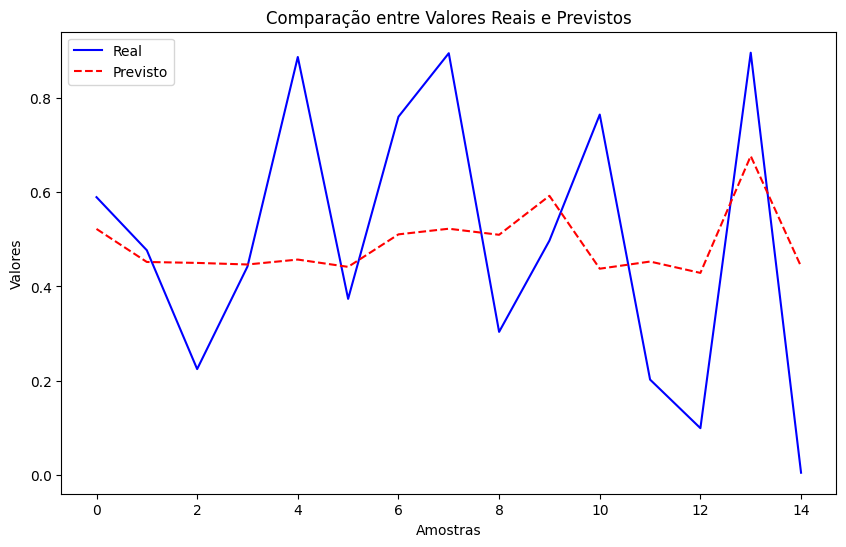

In [15]:
# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real', color='blue')
plt.plot(y_pred, label='Previsto', color='red', linestyle='--')
plt.legend()
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.show()

##Conclusão

Neste exemplo, utilizamos um modelo LSTM para prever o número de casos de COVID-19 com base em dados históricos. O modelo foi treinado, validado e testado, e as métricas de avaliação foram calculadas para avaliar o desempenho. O uso de técnicas de normalização e divisão adequada dos dados foi crucial para o sucesso do modelo.